In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

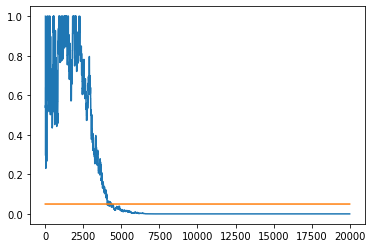

In [11]:
class DataGenerator:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2 

    def next(self):
        click1 = 1 if (np.random.random() < self.p1) else 0
        click2 = 1 if (np.random.random() < self.p2) else 0
        return click1, click2

def get_p_value(T):
    det = T[0, 0] * T[1, 1] - T[0, 1] * T[1, 0]
    c2 = float(det) / T[0].sum() * det / T[1].sum() * T.sum() / T[:, 0].sum() / T[:, 1].sum()
    p = 1 - stats.chi2.cdf(c2, df=1)
    return p 


def run_experiment(p1, p2, N):
    data = DataGenerator(p1, p2)
    p_values = np.empty(N)
    T = np.zeros((2, 2)).astype(np.float32)
    for i in range(N):
        c1, c2 = data.next()
        T[0, c1] += 1
        T[1, c2] += 1
        if i < 10:
            p_values[i] = None
        else:
            p_values[i] = get_p_value(T)
    plt.plot(p_values)
    plt.plot(np.ones(N) * 0.05)
    plt.show()


run_experiment(0.1, 0.11, 20000)